<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Taller 1 </h1>

<H2 align='center'> Máxima Inverosimilitud </H2>
<H4 align='center'> Matias Carvajal - 201873559-0</H3>
<H4 align='center'> Vicente Robles - 201673521-6</H3>
<H4 align='center'> Félix Vergara - 201510524-3</H3>

<hr style="height:2px;border:none"/>

Video: https://drive.google.com/file/d/1siBe01DbXPGsIj5O29QWHxLXeQfx8grM/view?usp=sharing

# Declaración de principios

Nosotros, integrantes de Máxima inverosimilitud, declaramos no haber incursado en ningún tipo de falta al código del estudiante, al no haber copiado ningún tipo de material. Todo trabajo fue realizado por nuestro propio esfuerzo e investigación, con uso de recursos citados.
  
Matias Carvajal: Prueba y testing de los modelos según dataset.

Vicente Robles: Búsqueda de datasets y participación en testing.
 
Félix Vergara: Participación activa en el codigo del taller y desafío



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sklearn.datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Hipótesis

Selección de Modelos: El número de variables con que se entrena un modelo es inversamente proporcional al error de pruebas y directamente proporcional a la diferencia entre el error de validación y el error de entrenamiento.

#Maldición de la dimensionalidad

Por lo visto en clases sabemos que mientras mas variables tengamos en un modelo (cuando tiende a infinito) el modelo no converge. Hay que tener cuidado en este taller pues estamos aumentando el número de variables linealmente.

Seleccionaremos linealmente las columnas para comparar los errores de validación, entrenamiento y prueba para luego generar una matriz de correlación y verficiar si son directamente proporcionales o inversamente proporcionales

#League of legends

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Machine learning/high_diamond_ranked_10min.csv")

In [ ]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


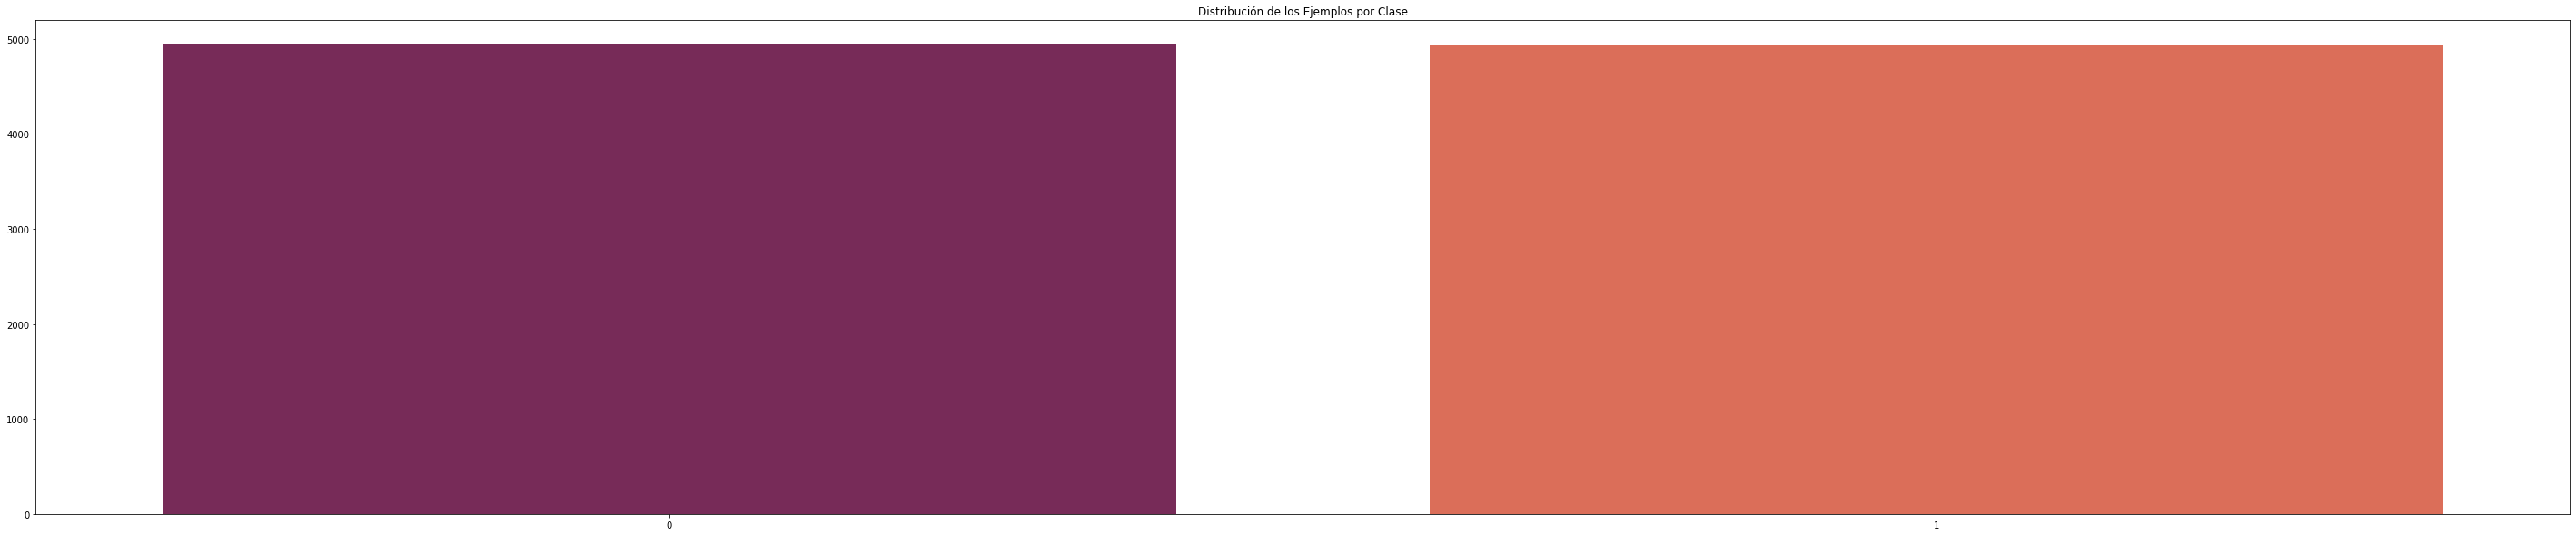

In [ ]:
clases, frecuencia = np.unique(df['blueWins'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

Vemos que todas las columnas son numéricas

In [ ]:
df.shape

(9879, 40)

In [ ]:
df.select_dtypes(include='number').shape

(9879, 40)

In [ ]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
df.drop(columns=['blueWins'])

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


##Naive Bayes

In [ ]:
lista=[i for i in range(1,40)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df.drop(columns=['blueWins'])
  X=X[X.columns[:n_columnas]].values
  y=df['blueWins'].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=GaussianNB()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,40)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.495002,0.002473,0.497475,0.532278
1,2,0.493610,-0.001186,0.492424,0.531013
2,3,0.474503,-0.025008,0.449495,0.497468
3,4,0.397950,0.043969,0.441919,0.389873
4,5,0.354802,0.001259,0.356061,0.341772
5,6,0.312160,-0.009130,0.303030,0.295570
6,7,0.314184,-0.016205,0.297980,0.310127
7,8,0.308617,-0.013162,0.295455,0.302532
8,9,0.316462,-0.026058,0.290404,0.298101
9,10,0.317348,-0.019368,0.297980,0.315823


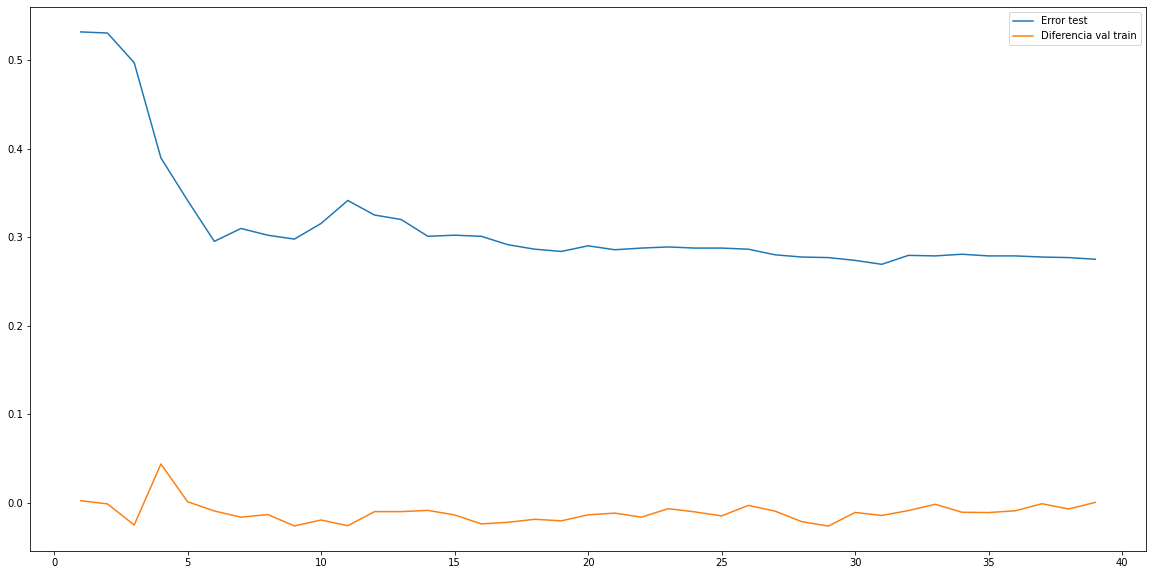

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.721759
Diferencia val train,-0.051750
Error val,-0.682288
Error test,-0.671875


##Regresión Logística


In [ ]:
lista=[i for i in range(1,40)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df.drop(columns=['blueWins'])
  X=X[X.columns[:n_columnas]].values
  y=df['blueWins'].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=LogisticRegression()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,40)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.494116,0.018510,0.512626,0.536076
1,2,0.493483,0.029244,0.522727,0.535443
2,3,0.477920,-0.028425,0.449495,0.511392
3,4,0.399595,0.044849,0.444444,0.394304
4,5,0.352777,-0.009343,0.343434,0.344937
5,6,0.295331,-0.015028,0.280303,0.301899
6,7,0.297102,-0.024375,0.272727,0.297468
7,8,0.294572,-0.021844,0.272727,0.301266
8,9,0.293812,-0.010984,0.282828,0.298734
9,10,0.294066,-0.011237,0.282828,0.298734


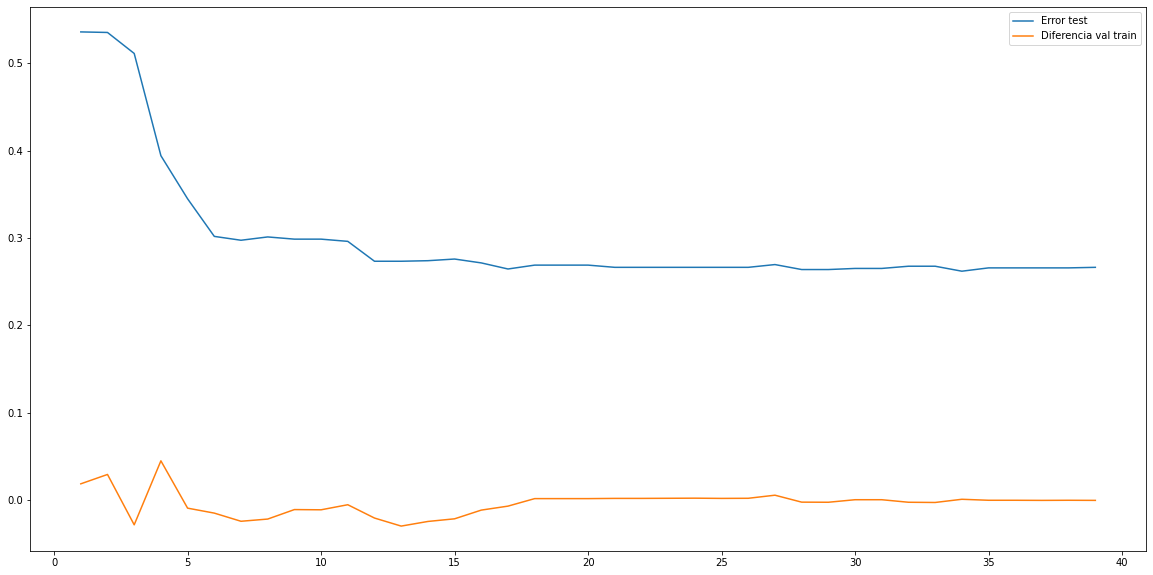

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.656761
Diferencia val train,0.119711
Error val,-0.575281
Error test,-0.640866


##Perceptron

In [ ]:
lista=[i for i in range(1,40)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df.drop(columns=['blueWins'])
  X=X[X.columns[:n_columnas]].values
  y=df['blueWins'].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=Perceptron()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,40)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.509427,-0.029629,0.479798,0.465190
1,2,0.500696,-0.028474,0.472222,0.517722
2,3,0.495382,-0.025685,0.469697,0.491772
3,4,0.515627,0.012151,0.527778,0.487975
4,5,0.433253,-0.016587,0.416667,0.434810
5,6,0.371758,-0.035899,0.335859,0.341772
6,7,0.334810,-0.046931,0.287879,0.315823
7,8,0.341010,-0.027878,0.313131,0.339873
8,9,0.343161,-0.030030,0.313131,0.325949
9,10,0.344300,-0.048845,0.295455,0.320886


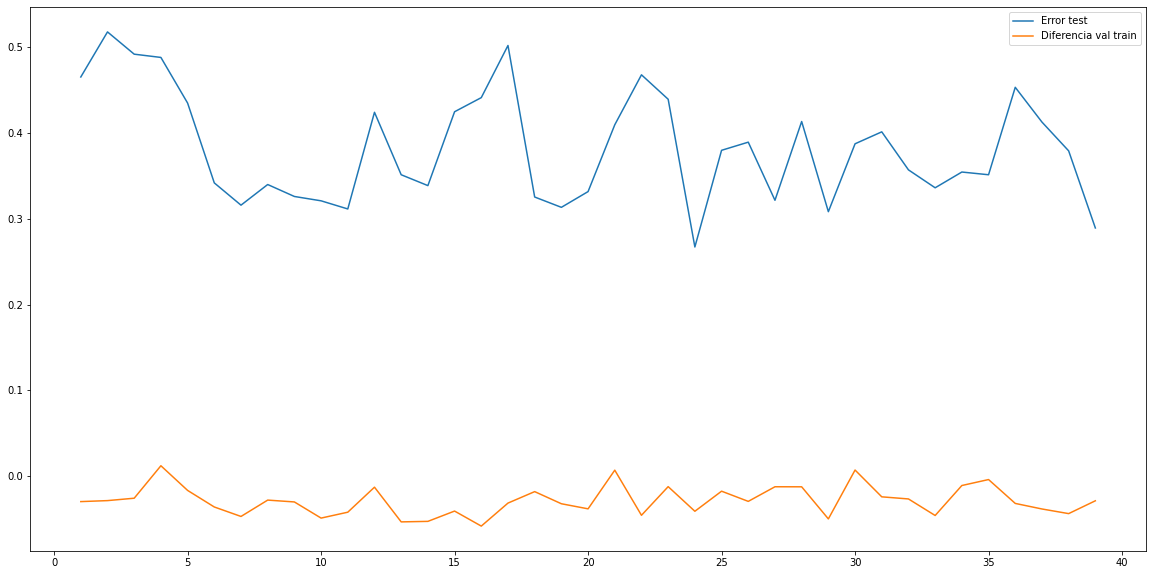

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.342692
Diferencia val train,0.081505
Error val,-0.291694
Error test,-0.270398


Para este caso puede que el dataset no sea linealmente separable, esto porque el Perceptron no converge en el conjunto de entrenamiento (no tiende a 0).

#Wine

El segundo dataset describe características del vino como la cantidad de alcohol, su acidez, e intensidad de color, etc. La idea es clasificarlo en 3 clases diferentes las cuales corresponden a localidades de Italia.

In [ ]:
data=sklearn.datasets.load_wine(as_frame=True)
df=data.data

In [ ]:
target=data.target

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


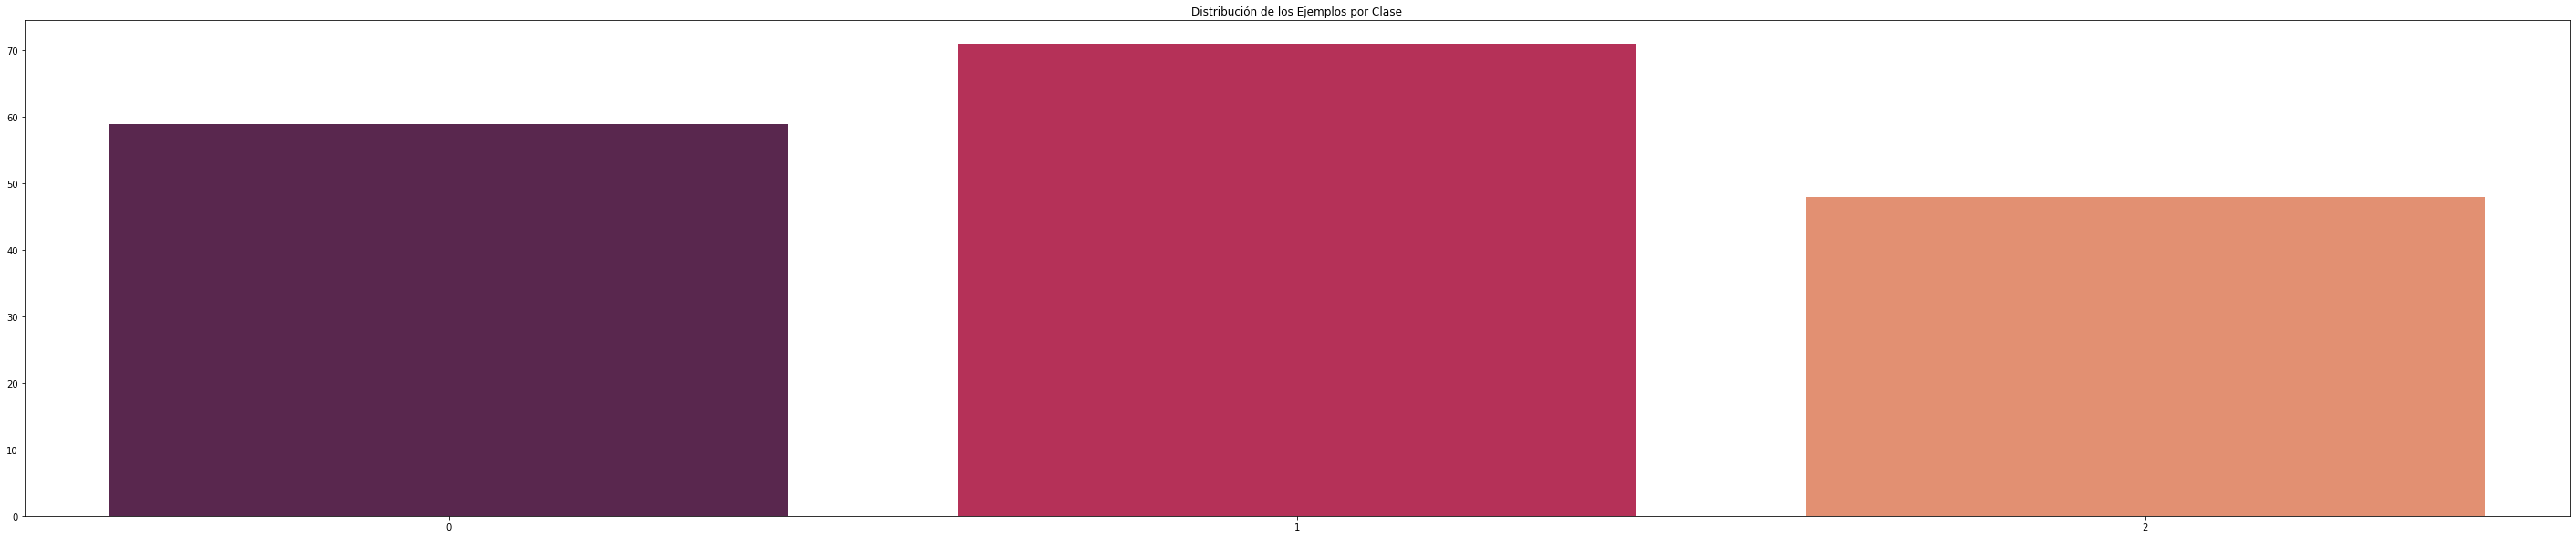

In [ ]:
clases, frecuencia = np.unique(target, return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

In [ ]:
df.select_dtypes(include='number').shape

(178, 13)

##Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,13)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=GaussianNB()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,13)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.345070,-0.220070,0.125,0.214286
1,2,0.197183,0.052817,0.250,0.178571
2,3,0.218310,-0.093310,0.125,0.178571
3,4,0.161972,-0.036972,0.125,0.071429
4,5,0.169014,-0.044014,0.125,0.071429
5,6,0.126761,-0.001761,0.125,0.000000
6,7,0.063380,0.061620,0.125,0.000000
7,8,0.049296,0.075704,0.125,0.035714
8,9,0.063380,0.061620,0.125,0.000000
9,10,0.049296,0.200704,0.250,0.000000


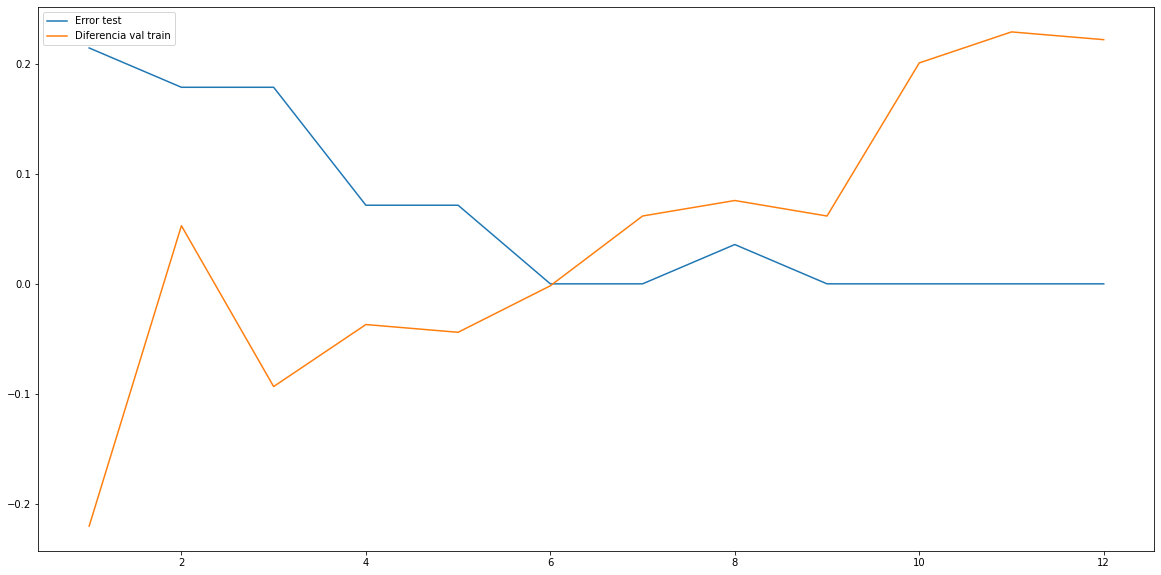

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.925612
Diferencia val train,0.887286
Error val,0.460882
Error test,-0.871066


##Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,13)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=LogisticRegression()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,13)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.352113,-0.227113,0.125,0.214286
1,2,0.211268,0.163732,0.375,0.178571
2,3,0.204225,-0.079225,0.125,0.142857
3,4,0.133803,0.116197,0.250,0.071429
4,5,0.126761,0.123239,0.250,0.035714
5,6,0.084507,0.165493,0.250,0.000000
6,7,0.021127,0.103873,0.125,0.000000
7,8,0.028169,0.096831,0.125,0.000000
8,9,0.028169,0.096831,0.125,0.000000
9,10,0.000000,0.000000,0.000,0.000000


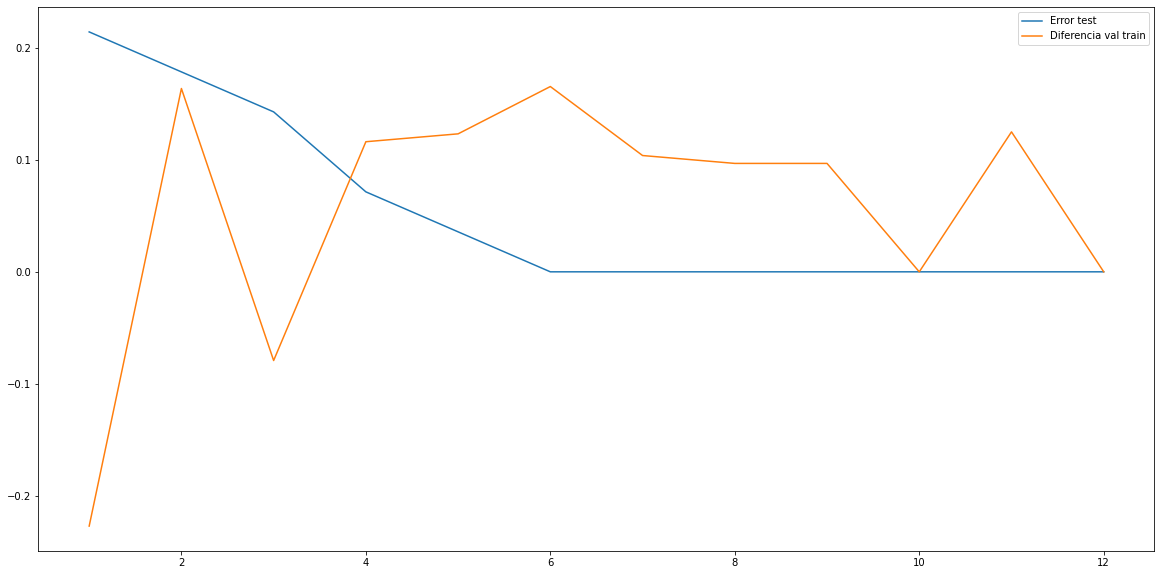

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.919322
Diferencia val train,0.269149
Error val,-0.655070
Error test,-0.856967


##Perceptrón

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,13)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=Perceptron()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,13)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.387324,-0.387324,0.000,0.285714
1,2,0.302817,-0.177817,0.125,0.214286
2,3,0.500000,0.125000,0.625,0.464286
3,4,0.176056,-0.051056,0.125,0.214286
4,5,0.147887,-0.022887,0.125,0.214286
5,6,0.098592,0.151408,0.250,0.000000
6,7,0.056338,-0.056338,0.000,0.000000
7,8,0.056338,-0.056338,0.000,0.000000
8,9,0.056338,0.068662,0.125,0.035714
9,10,0.014085,-0.014085,0.000,0.000000


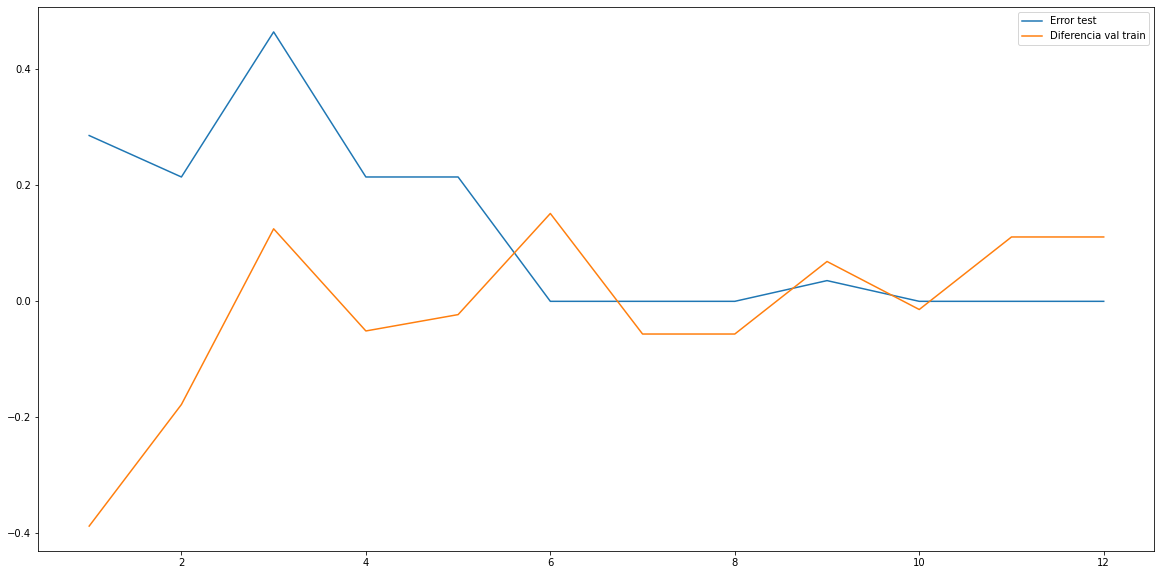

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.859890
Diferencia val train,0.611341
Error val,-0.265127
Error test,-0.798885


#Digits

El último dataset es de dígitos escritos a manos, cada columna representa un pixel dentro de la imágen. Nuestra tarea será clasificar cada dígito del 0 al 9.

##Naive Bayes

(1797, 64)


<Figure size 432x288 with 0 Axes>

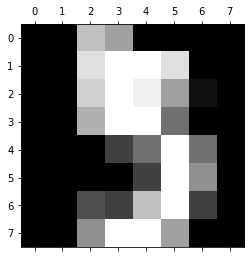

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
target = digits.target
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[5])
plt.show()

In [ ]:
digits.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df=digits.data

In [ ]:
df.shape

(1797, 64)

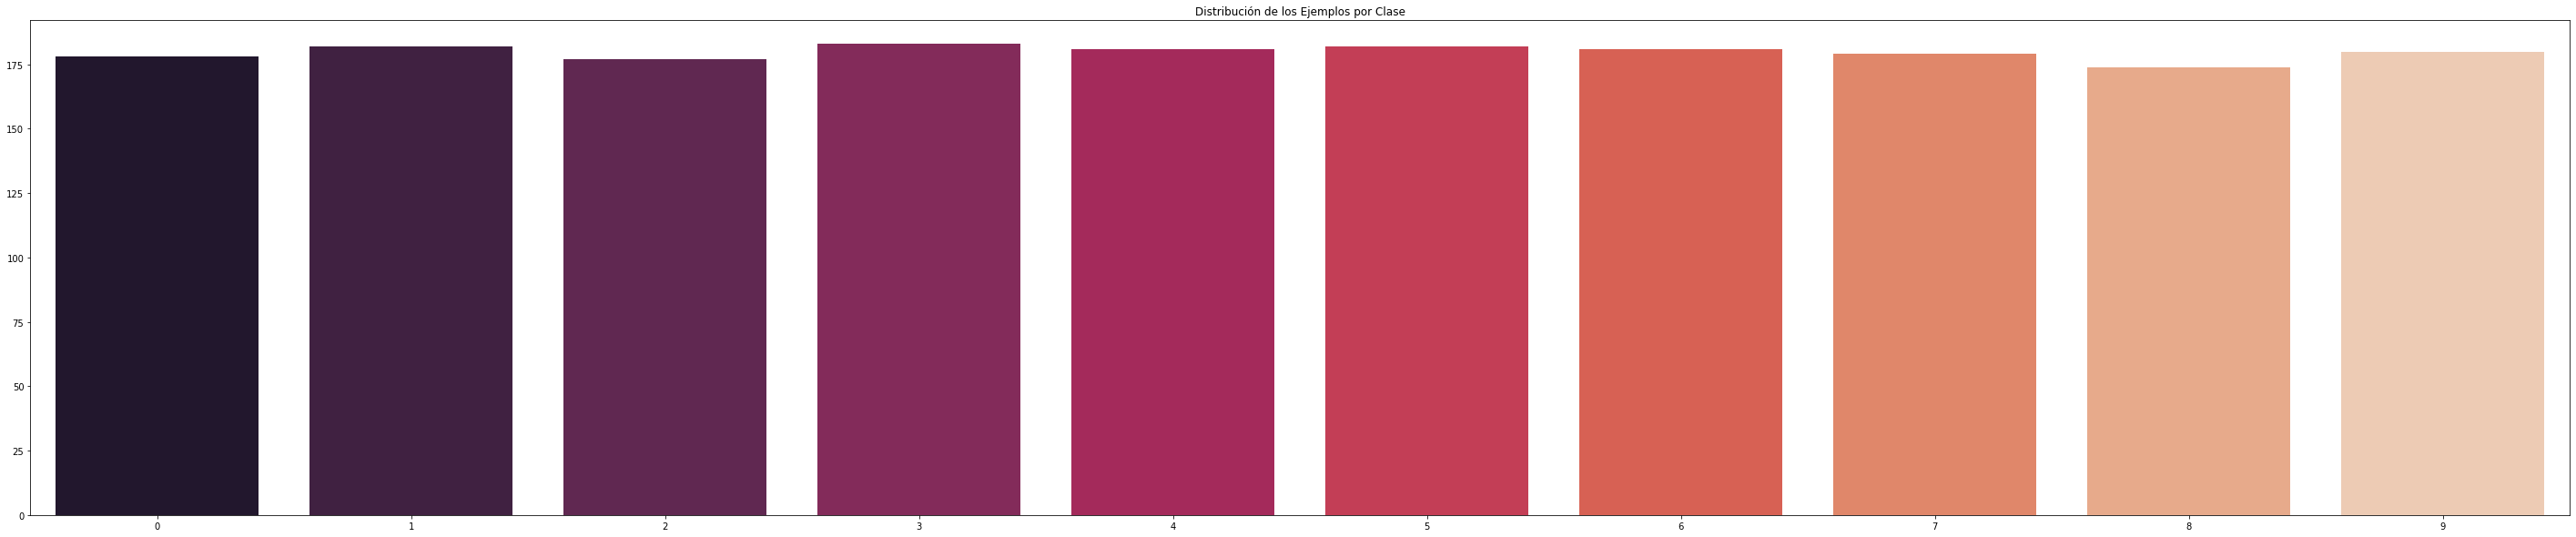

In [ ]:
clases, frecuencia = np.unique(target, return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

In [ ]:
df.select_dtypes(include='number').shape

(1797, 64)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,64)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=GaussianNB()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,64)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.899095,0.003682,0.902778,0.909722
1,2,0.848295,0.040594,0.888889,0.847222
2,3,0.803062,-0.066951,0.736111,0.798611
3,4,0.788448,-0.038448,0.750000,0.736111
4,5,0.754349,-0.004349,0.750000,0.743056
...,...,...,...,...,...
58,59,0.204593,0.087074,0.291667,0.211806
59,60,0.203201,0.088466,0.291667,0.215278
60,61,0.195546,0.096120,0.291667,0.208333
61,62,0.196242,0.081536,0.277778,0.197917


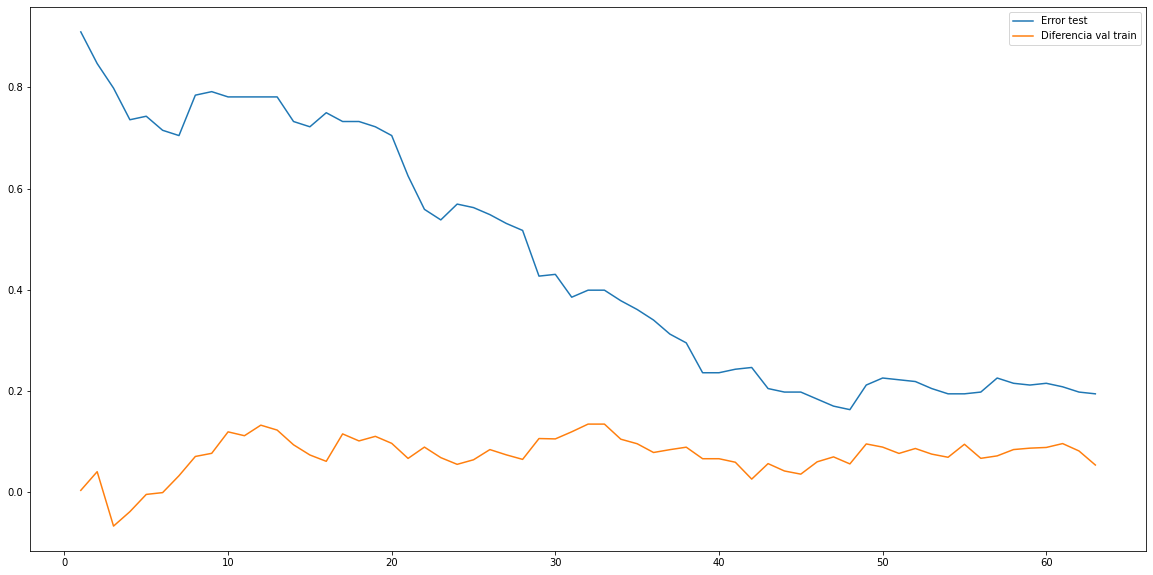

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.958945
Diferencia val train,0.234332
Error val,-0.938150
Error test,-0.952890


##Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,64)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=LogisticRegression(solver='liblinear')
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,64)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.892832,0.051612,0.944444,0.916667
1,2,0.849687,0.066980,0.916667,0.875000
2,3,0.773138,-0.037027,0.736111,0.791667
3,4,0.720251,-0.011917,0.708333,0.722222
4,5,0.650661,-0.067328,0.583333,0.680556
...,...,...,...,...,...
58,59,0.012526,0.015252,0.027778,0.031250
59,60,0.011830,0.015948,0.027778,0.034722
60,61,0.010438,0.017339,0.027778,0.038194
61,62,0.011830,0.015948,0.027778,0.038194


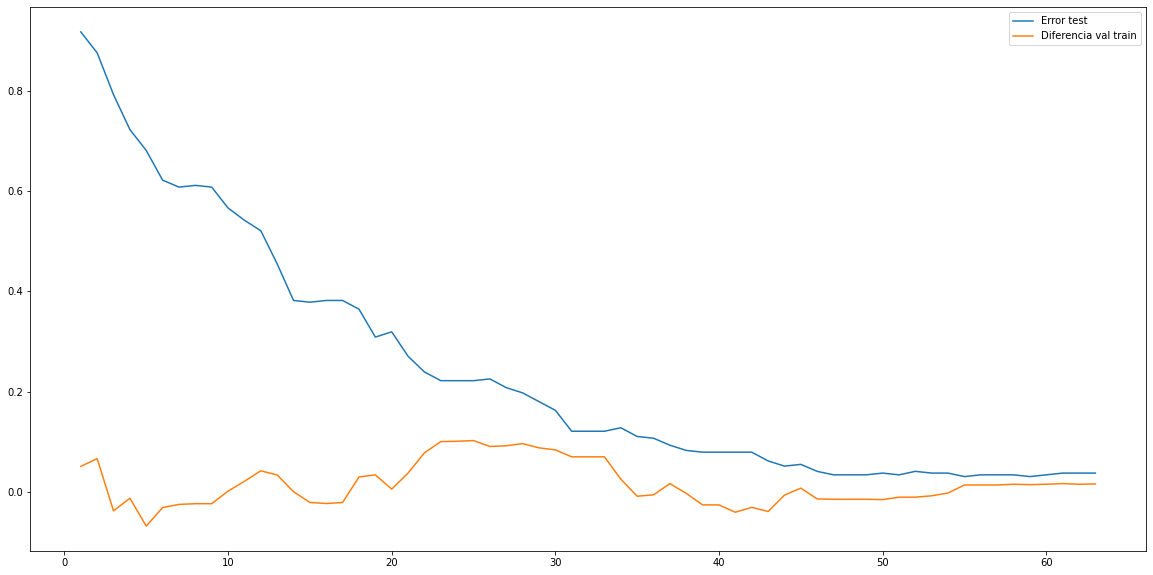

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.925038
Diferencia val train,-0.095271
Error val,-0.930886
Error test,-0.905799


##Perceptrón

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
lista=[i for i in range(1,64)]
accuracy_train=[]
accuracy_test=[]
accuracy_val=[]
for n_columnas in lista:
  X=df[df.columns[:n_columnas]].values
  y=target.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_test,X_val,y_test,y_val=train_test_split(X_test, y_test, test_size=0.2, random_state=42)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
  X_val=scaler.transform(X_val)
  model=Perceptron()
  model.fit(X_train,y_train)
  accuracy_train.append(accuracy_score(model.predict(X_train), y_train))
  accuracy_test.append(accuracy_score(model.predict(X_test), y_test))
  accuracy_val.append(accuracy_score(model.predict(X_val), y_val))

In [ ]:
Error_test_corr=(pd.DataFrame([1]*len(accuracy_test))-pd.DataFrame(accuracy_test)).values.flatten()
Error_val_corr=(pd.DataFrame([1]*len(accuracy_val))-pd.DataFrame(accuracy_val)).values.flatten()
Error_train_corr=(pd.DataFrame([1]*len(accuracy_train))-pd.DataFrame(accuracy_train)).values.flatten()

In [ ]:
df_corr=pd.DataFrame({'N_columnas':[i for i in range(1,64)],'Error train':Error_train_corr,'Diferencia val train':Error_val_corr-Error_train_corr,'Error val':Error_val_corr,'Error test':Error_test_corr})

In [ ]:
df_corr

,N_columnas,Error train,Diferencia val train,Error val,Error test
0,1,0.899095,0.003682,0.902778,0.909722
1,2,0.873347,0.015542,0.888889,0.868056
2,3,0.868476,0.020413,0.888889,0.885417
3,4,0.881698,-0.020587,0.861111,0.888889
4,5,0.832985,-0.027430,0.805556,0.795139
...,...,...,...,...,...
58,59,0.023660,0.004117,0.027778,0.059028
59,60,0.034795,0.020761,0.055556,0.065972
60,61,0.022269,0.019398,0.041667,0.048611
61,62,0.022965,-0.009076,0.013889,0.055556


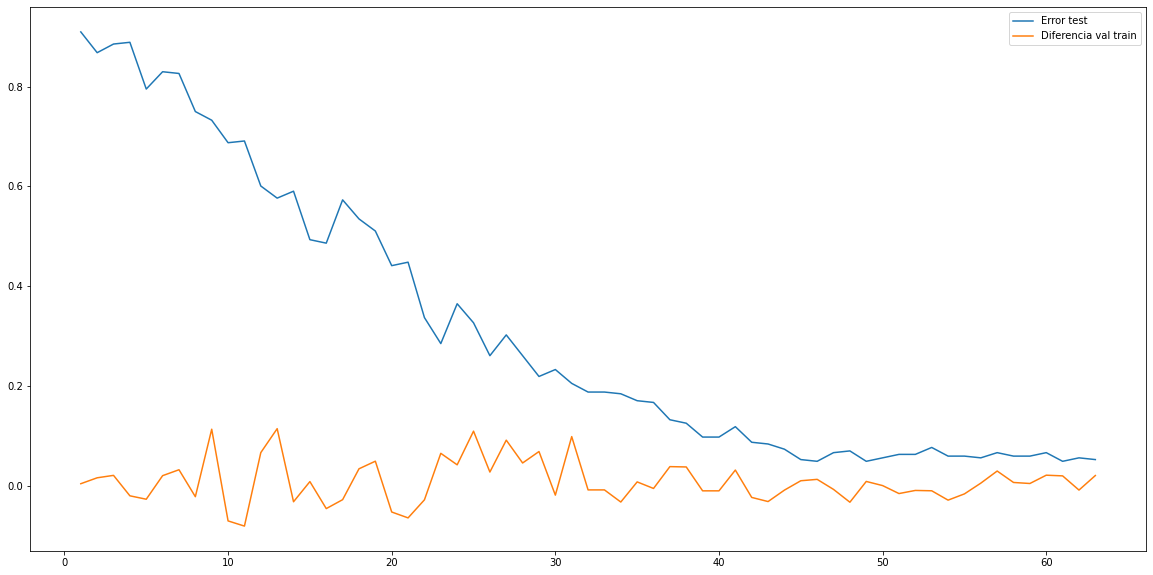

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
plt.plot(df_corr['N_columnas'],df_corr['Error test'],label='Error test')
plt.plot(df_corr['N_columnas'],df_corr['Diferencia val train'],label='Diferencia val train')
plt.legend()
plt.show()

In [ ]:
pd.DataFrame(df_corr.corr()['N_columnas'])

,N_columnas
N_columnas,1.000000
Error train,-0.950229
Diferencia val train,-0.075009
Error val,-0.947078
Error test,-0.933686


#Conclusiones

Podemos concluir que la primera parte de la hipótesis se cumple usando los 3 dataset y los 3 modelos. Sin embargo la segunda parte de la hipótesis no se observa experimentalmente en todos los dataset y modelos, por lo que no es posible generalizar los resultados para validar la hipótesis, ya que la correlación entre el número de columnas y la diferencia entre el error de validación y entrenamiento es cercana a 0 en la mayoría de los dataset, es decir no existe correlación lineal (medido con la correlación de Pearson).